# Enter your details in the cells below

This project is to showcase my skills Python. In this project, I will be focusing is on the Exploratory Data Analysis. The dataset is structured, clean and tidy but need few data cleaning too.

#  Project
### Problem Statement

In the year 2013, a supermarket decided to draw insight from their data in order to make data driven decisions.
As a Data Analyst,you are presented with their 2013 daily sales records (sales_data.csv) and tasked to help them find answers to the questions below by analysing the data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the sales and profit per market.
   
   iii.Which market brings more sales on the average?

2. i. What are the best 10 performing products with regards to sales in 2013?

   ii.What are the least 10 performing products with regards to sales 2013?


3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

4. i. By analyzing the data, what is the correlation between sales and discount?

   ii. Use a scatter plot to show the relationship between sales and profit.

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   
6. i. Which customer spent the most in the whole year?
   ii. What product does the customer in (i) buy the most?
   iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   









In [2]:
#import your packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load the sales data here
#i added 'r' afore the file path to enable pandas read file into a dataframe
sales_data= pd.read_csv(r"C:\Users\esther\Desktop\Assessment project\sales_data.csv")
sales_data.tail()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
13794,13794,2013-12-31,TU-2013-9400,TM-11490,Tony Molinari,Consumer,Gaziantep,EMEA,EMEA,Furniture,Furnishings,"Eldon Light Bulb, Black",10.080,1,0.6,-5.5500
13795,13795,2013-12-31,CA-2013-163951,CJ-11875,Carl Jackson,Corporate,Philadelphia,US,East,Office Supplies,Art,Newell 31,16.520,5,0.2,1.6520
13796,13796,2013-12-31,US-2013-111528,JP-16135,Julie Prescott,Home Office,Los Angeles,US,West,Office Supplies,Binders,Cardinal Hold-It CD Pocket,6.384,1,0.2,2.1546
13797,13797,2013-12-31,CA-2013-117660,BM-11785,Bryan Mills,Consumer,Columbus,US,East,Office Supplies,Labels,Avery 487,5.904,2,0.2,1.9926
13798,13798,2013-12-31,IZ-2013-2550,DM-3015,Darrin Martin,Consumer,Basra,EMEA,EMEA,Office Supplies,Binders,"Wilson Jones Binder, Economy",13.020,1,0.0,4.0200


Let's take a quick look at the Data we are working with

In [4]:
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13799 non-null  int64  
 1   Order Date     13799 non-null  object 
 2   Order ID       13799 non-null  object 
 3   Customer ID    13799 non-null  object 
 4   Customer Name  13799 non-null  object 
 5   Segment        13799 non-null  object 
 6   City           13799 non-null  object 
 7   Market         13799 non-null  object 
 8   Region         13799 non-null  object 
 9   Category       13799 non-null  object 
 10  Sub-Category   13799 non-null  object 
 11  Product Name   13799 non-null  object 
 12  Sales          13799 non-null  float64
 13  Quantity       13799 non-null  int64  
 14  Discount       13799 non-null  float64
 15  Profit         13799 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 1.7+ MB


In [5]:
#coverted the 'Order Date' column to datetime data type
sales_data['Order Date'] =  sales_data['Order Date'].astype('datetime64[ns]')
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     13799 non-null  int64         
 1   Order Date     13799 non-null  datetime64[ns]
 2   Order ID       13799 non-null  object        
 3   Customer ID    13799 non-null  object        
 4   Customer Name  13799 non-null  object        
 5   Segment        13799 non-null  object        
 6   City           13799 non-null  object        
 7   Market         13799 non-null  object        
 8   Region         13799 non-null  object        
 9   Category       13799 non-null  object        
 10  Sub-Category   13799 non-null  object        
 11  Product Name   13799 non-null  object        
 12  Sales          13799 non-null  float64       
 13  Quantity       13799 non-null  int64         
 14  Discount       13799 non-null  float64       
 15  Profit         1379

## Dataset is ready for Analysis

1. i. What is the average sales and profit per market? 

 

In [25]:
Avg_sales_per_market= pd.DataFrame(sales_data.groupby('Market')['Sales'].mean())
Avg_sales_per_market 

,Sales
Market,
APAC,337.225210
Africa,177.023796
Canada,180.765566
EMEA,156.453122
EU,297.415215
LATAM,198.738815
US,235.842570


 1.  ii.Plot a stacked bar chart showing the sales and profit per market.
   


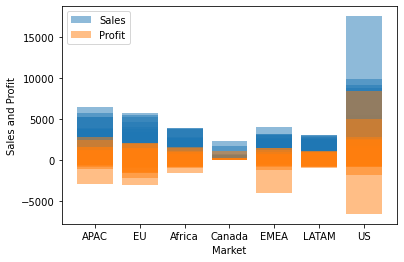

In [7]:
fig, ax = plt.subplots()
sns.set_palette("colorblind")

ax.bar(sales_data['Market'], sales_data['Sales'], label= 'Sales', alpha= 0.5)
ax.bar(sales_data['Market'], sales_data['Profit'], label= "Profit", alpha=0.5)

ax.set_ylabel("Sales and Profit")
ax.set_xlabel("Market")
ax.legend()

plt.show()

1.    iii.Which market brings more sales on the average?


In [8]:
highest_avg_sales= sales_data.groupby('Market')['Sales'].mean(). sort_values(ascending= False)
highest_avg_sales.head(1)

Market
APAC    337.22521
Name: Sales, dtype: float64


2. i. What are the best 10 performing products with regards to sales in 2013?


In [9]:
best_products_sales= sales_data.groupby('Product Name').agg({"Sales":"sum"})
best_products_sales=best_products_sales.sort_values("Sales",ascending= False)
best_products_sales[:10]

,Sales
Product Name,
"Motorola Smart Phone, Full Size",29357.0982
"Cisco Smart Phone, Full Size",26737.1330
Canon imageCLASS 2200 Advanced Copier,25899.9260
"Harbour Creations Executive Leather Armchair, Adjustable",21871.1296
"Apple Smart Phone, Full Size",21120.4080
"Hon Executive Leather Armchair, Adjustable",20104.6026
"Office Star Executive Leather Armchair, Adjustable",19936.1460
"Nokia Smart Phone, with Caller ID",18568.8543
"Samsung Smart Phone, VoIP",16733.1120



2. ii.What are the least 10 performing products with regards to sales 2013?

In [10]:
least_products_sales= sales_data.groupby('Product Name').agg({'Sales':'sum'})
least_products_sales= least_products_sales.sort_values('Sales',ascending= True)
least_products_sales[:10]

,Sales
Product Name,
Newell 310,1.408
"OIC #2 Pencils, Medium Soft",1.504
Avery Durable Binders,1.728
Maxell 4.7GB DVD+R 5/Pack,1.980
"Acco Banker's Clasps, 5 3/4""-Long",2.304
Avery 479,2.610
Acco 3-Hole Punch,2.628
"Eldon Spacemaker Box, Quick-Snap Lid, Clear",2.672
Newell 32,2.880



3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   

In [11]:
sales_data['Days']= sales_data['Order Date'].dt.day_name()
sales_data['Months']= sales_data['Order Date'].dt.month_name()

sales_data.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days,Months
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624,Tuesday,January
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700,Tuesday,January
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472,Tuesday,January
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060,Tuesday,January
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410,Tuesday,January


3.  ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

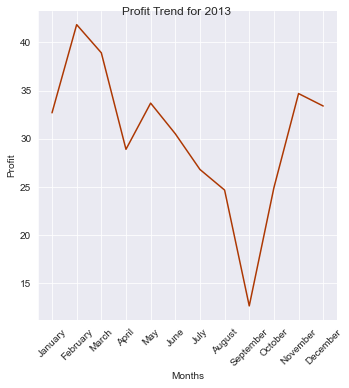

In [12]:
sns.set_style('darkgrid')
sns.set_palette('Oranges_r')
profit_trend_months= sns.relplot(x= 'Months', y='Profit',data= sales_data,kind='line', ci=None)
profit_trend_months.fig.suptitle("Profit Trend for 2013")
plt.xticks(rotation=45)
plt.show()

3.  
   iii. Which month does the company make more profit and what 5 products are sold most in that month?
  

As shown in the line plot above, the company makes a lot of profit in the month of February. Let's find out what product ismost sold in the month of February.

In [13]:
february_sales= sales_data[sales_data["Months"] == "February"]
february_sales

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days,Months
381,381,2013-02-01,ID-2013-29564,RL-19615,Rob Lucas,Consumer,Newcastle,APAC,Oceania,Furniture,Bookcases,"Bush Library with Doors, Metal",1637.0100,5,0.100,-36.3900,Friday,February
382,382,2013-02-01,IR-2013-3500,AG-525,Andy Gerbode,Corporate,Ardabil,EMEA,EMEA,Technology,Phones,"Motorola Signal Booster, Full Size",2021.8800,14,0.000,323.4000,Friday,February
383,383,2013-02-01,ES-2013-5114494,KW-16435,Katrina Willman,Consumer,Derby,EU,North,Furniture,Bookcases,"Sauder Floating Shelf Set, Pine",1567.4400,8,0.000,360.4800,Friday,February
384,384,2013-02-01,MX-2013-159583,TN-21040,Tanja Norvell,Home Office,Mérida,LATAM,North,Technology,Copiers,"Brother Fax Machine, High-Speed",1053.6884,5,0.002,441.2884,Friday,February
385,385,2013-02-01,ES-2013-1059602,BS-11755,Bruce Stewart,Consumer,Livry-Gargan,EU,Central,Office Supplies,Appliances,"Hoover Stove, Black",1533.3300,3,0.100,-34.1100,Friday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12385,12385,2013-02-28,ES-2013-5431940,TP-21130,Theone Pippenger,Consumer,Gien,EU,Central,Office Supplies,Fasteners,"OIC Paper Clips, Metal",14.5500,1,0.000,3.7800,Thursday,February
12386,12386,2013-02-28,TU-2013-5530,SC-10095,Sanjit Chand,Consumer,Izmir,EMEA,EMEA,Office Supplies,Storage,"Smead Shelving, Industrial",19.7640,1,0.600,-17.7960,Thursday,February
12387,12387,2013-02-28,ES-2013-4295346,JS-16030,Joy Smith,Consumer,Le Mans,EU,Central,Office Supplies,Binders,"Cardinal Hole Reinforcements, Durable",6.8400,2,0.500,-4.0200,Thursday,February
12388,12388,2013-02-28,TU-2013-5530,SC-10095,Sanjit Chand,Consumer,Izmir,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Industrial",6.7920,1,0.600,-2.2080,Thursday,February


In [14]:

most_sold_feb= pd.DataFrame(february_sales.groupby('Product Name')["Sales"].sum().sort_values(ascending=False))
most_sold_feb[:5]


,Sales
Product Name,
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",8749.950
"KitchenAid Refrigerator, Black",7910.550
Ativa V4110MDD Micro-Cut Shredder,4899.930
GBC DocuBind P400 Electric Binding System,4355.168
"Chromcraft Wood Table, Adjustable Height",3877.680


3.  iv.  which day does the company make high sales on the average?

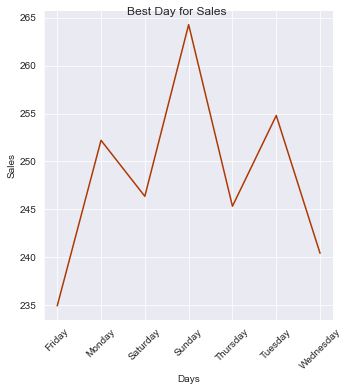

In [15]:
Avg_sales_per_day=sales_data.groupby('Days').agg({'Sales':'mean'})

Sales_day= sns.relplot(x= 'Days', y='Sales',data= Avg_sales_per_day,kind='line', ci=None )
Sales_day.fig.suptitle("Best Day for Sales")
plt.xticks(rotation=45)
plt.show()

Sunday appears to be the day more items are sold

4. i. By analyzing the data, what is the correlation between sales and discount?

  

In [16]:
cor_sales_discount= np.corrcoef(sales_data['Sales'], sales_data['Discount'])
cor_sales_discount



array([[ 1.        , -0.08470981],
       [-0.08470981,  1.        ]])

There is almost zero correlation between the Sales and Discount. This implies that the Sales made was not affected by the discount giving in anyway.

4 ii. Use a scatter plot to show the relationship between sales and profit.

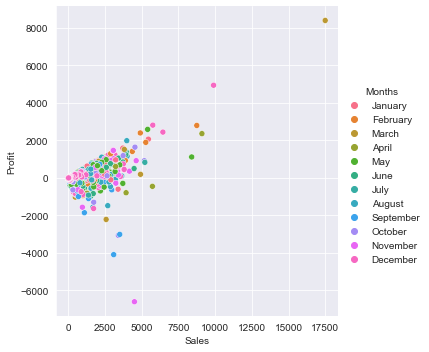

In [17]:
sns.relplot(x= 'Sales', y= 'Profit', data=sales_data, kind= 'scatter',hue= 'Months')
plt.show()

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   


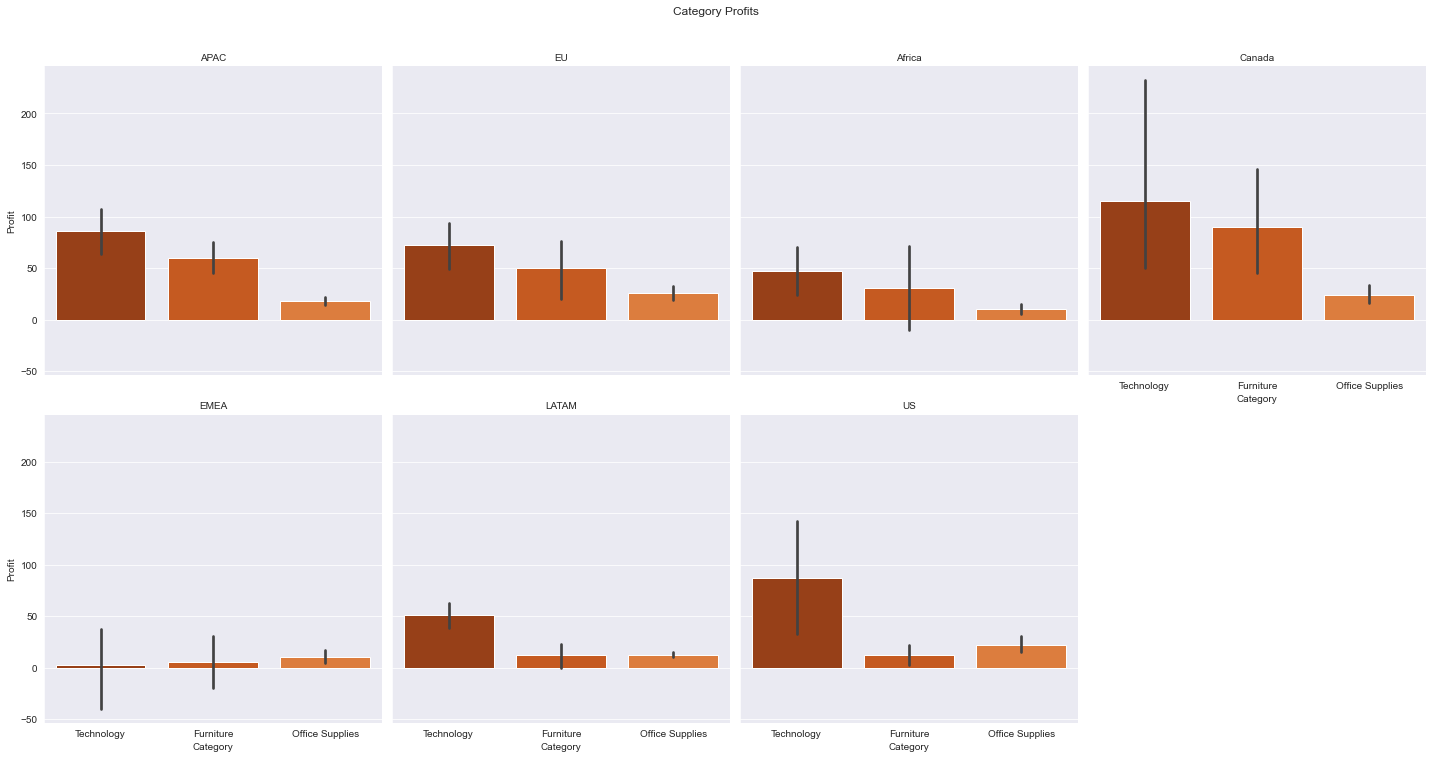

In [18]:

cat_profit= sns.catplot(x= 'Category', y= "Profit", data= sales_data, kind= 'bar',col='Market',col_wrap=4 )
cat_profit.fig.suptitle('Category Profits',y= 1.05)
cat_profit.set_titles('{col_name}')

5. ii. From your graph, which product category performs well in each market?
From the graph plotted above, The technology category is performing better than the rest in all the market except EMEA.

6. i. Which customer spent the most in the whole year?
  

In [19]:

sales_data['Customer ID'].unique().sum()
customer_highest= sales_data.groupby("Customer ID")['Sales'].sum().sort_values(ascending=False)
customer_highest

Customer ID
TC-20980    23036.98800
CC-12370    18195.98840
LB-16795    16271.59032
JE-15715    16262.57690
SE-20110    15527.93402
               ...     
TS-11655        5.76000
JK-5640         5.70000
SS-10515        4.80000
KF-6285         4.10400
JM-6195         3.34800
Name: Sales, Length: 1458, dtype: float64

In [20]:
customer_highest= sales_data[sales_data['Customer ID']=='TC-20980']
customer_highest

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days,Months
1103,1103,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,US,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,Sunday,March
1107,1107,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,US,Central,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,735.980,2,0.0,331.1910,Sunday,March
1133,1133,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,US,Central,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,33.960,2,0.0,9.5088,Sunday,March
1136,1136,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,US,Central,Office Supplies,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480,2,0.0,4.8720,Sunday,March
1139,1139,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,US,Central,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",34.370,7,0.0,16.8413,Sunday,March
3409,3409,2013-08-10,MX-2013-124667,TC-20980,Tamara Chand,Corporate,Sonsonate,LATAM,Central,Office Supplies,Art,"Sanford Markers, Water Color",158.580,9,0.0,39.6000,Saturday,August
3937,3937,2013-09-12,MX-2013-113124,TC-20980,Tamara Chand,Corporate,Bogotá,LATAM,South,Technology,Accessories,"Enermax Keyboard, Programmable",169.920,3,0.0,15.2400,Thursday,September
6741,6741,2013-11-15,US-2013-164119,TC-20980,Tamara Chand,Corporate,Tegucigalpa,LATAM,Central,Technology,Phones,"Nokia Smart Phone, with Caller ID",1022.256,4,0.4,-0.0640,Friday,November
6742,6742,2013-11-15,US-2013-164119,TC-20980,Tamara Chand,Corporate,Tegucigalpa,LATAM,Central,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1093.248,6,0.4,-328.0320,Friday,November
6766,6766,2013-11-15,US-2013-164119,TC-20980,Tamara Chand,Corporate,Tegucigalpa,LATAM,Central,Office Supplies,Storage,"Tenex Lockers, Single Width",245.016,3,0.4,-85.7640,Friday,November


Tamara Chand is the customer with the highest purchases.

6.  ii. What product does the customer in (i) buy the most?
  

In [21]:
Tamara_product1= customer_highest.groupby('Product Name').agg({"Sales":"sum","Quantity":"sum"}).sort_values(by=["Quantity"],ascending=False)
Tamara_product1[:1]


#Tamara Chand's most purchased product in terms of quantity is  Sanford Markers, Water Color

,Sales,Quantity
Product Name,,
"Sanford Markers, Water Color",158.58,9


In [22]:
Tamara_product2=customer_highest.groupby('Product Name').agg({"Sales":"sum","Quantity":"sum"}).sort_values(by=["Sales"],ascending=False)
Tamara_product2[:1]
#Tamara Chand's most purchased product in terms of cost is Canon imageCLASS 2200 Advanced Copier

,Sales,Quantity
Product Name,,
Canon imageCLASS 2200 Advanced Copier,17499.95,5


  iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   
7. Can you do any other analysis to draw more insight? Feel free to do it.


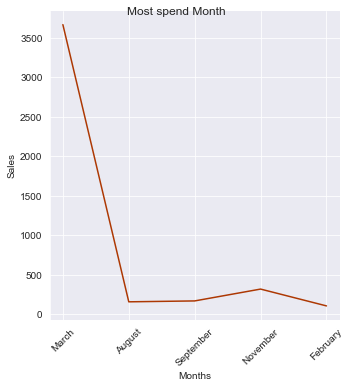

In [23]:
Tamara_month=sns.relplot(x= 'Months', y='Sales',data= customer_highest,kind='line', ci=None )
Tamara_month.fig.suptitle("Most spend Month")
plt.xticks(rotation=45)
plt.show()


6.  iv. How much did this customer spend in the whole year?
   


In [24]:
whole_year_exp= customer_highest['Sales'].sum()
whole_year_exp

23036.987999999998

7. Can you do any other analysis to draw more insight? Feel free to do it.

Sincerely, Esther.